# Gradient Vanishing and Exploding

## Gradient Vanishing

When doing backpropagation, if the derivative is too small it decreases exponentially at each layer. At a point the gradient becomes too small and this is called **vanishing gradients**.

## Gradient Exploding

When doing backpropagation, if the derivative is too large it increases exponentially at each layer. At a point the gradient becomes too large and this is called **exploding gradients**.

---

## Mathematical Intuition

### Example Chain Rule Product

$$\text{gradient} = D_1 \times D_2 \times \cdots \times D_L$$

This simplification captures the essence of gradient flow through $L$ layers.

### Case 1: Each Derivative Is Smaller Than 1

Assume: $|D_l| = 0.5$ for all $l$

Then: $\text{gradient} = 0.5^L$

Now observe:

| Depth $L$ | Gradient |
|-----------|----------|
| 5 | $0.5^5 = 0.031$ |
| 10 | $0.5^{10} = 0.00098$ |
| 50 | $0.5^{50} \approx 10^{-15}$ |

**Interpretation:**
- Each layer shrinks the gradient
- Many small shrinkages multiply
- Result: gradient becomes effectively zero
- This is **vanishing gradients**

### Case 2: Each Derivative Is Larger Than 1

Assume: $|D_l| = 1.5$

Then: $\text{gradient} = 1.5^L$

| Depth $L$ | Gradient |
|-----------|----------|
| 5 | $7.6$ |
| 10 | $57$ |
| 50 | $7.2 \times 10^8$ |

**Interpretation:**
- Each layer amplifies the gradient
- Amplifications multiply
- Result: gradient becomes enormous
- This is **exploding gradients**

---

## One of the Main Culprits: The Activation Function

The derivative of an activation function needs to have a stable derivative.

Each layer derivative is roughly:

$$D_l \approx W_l \times f'(z_l)$$

Where:
- $W_l$ = weight matrix
- $f'(z_l)$ = derivative of activation

### Example: Sigmoid

$$f'(z) \leq 0.25$$

Even with moderate weights:

$$D_l \leq 0.25 \Rightarrow \text{gradient} \approx (0.25)^L$$

Which vanishes very fast.

---

## Matrix Version

In reality, $D_l$ is a matrix, not a number.

The key quantity is:

$$\|D_l\| = \text{maximum stretching factor of the layer}$$

- If $\|D_l\| < 1$: layer shrinks signals
- If $\|D_l\| > 1$: layer stretches signals

The full gradient norm is bounded by:

$$\|\text{gradient}\| \leq \|D_L\| \cdot \|D_{L-1}\| \cdots \|D_1\|$$

This is the matrix version of the scalar product intuition.

---

## Exponential Behavior Comes from Repetition

The word "exponential" appears because:

$$\text{product of many similar numbers} \Rightarrow \text{power law}$$

$$(0.9)^L \text{ or } (1.1)^L$$

Even small deviations from 1 become catastrophic when repeated many times.

---

## Why ReLU Does NOT Shrink Gradients

When ReLU is active ($z > 0$):

$$f'(z) = 1$$

So the gradient term becomes:

$$D_l \approx W_l \cdot 1 = W_l$$

Compare with sigmoid:

$$D_l \approx W_l \cdot 0.1 \text{ (typical)}$$

**Thus:**
- Sigmoid shrinks gradients every layer
- ReLU passes gradients unchanged (when active)

---

## Why "Half the Neurons Die" Is Still Better

ReLU sets gradients to zero when $z \leq 0$.

Yes:
- Some neurons receive zero gradient
- This is the **dying ReLU problem**

But importantly:
- The active neurons propagate gradients perfectly
- Surviving paths remain strong across depth
- Vanishing gradients is about **all paths shrinking**. ReLU avoids that.

---

## Interaction with Weight Initialization (Critical)

ReLU alone is not enough. Combine it with **He initialization**:

$$\text{Var}(W) = \frac{2}{\text{fan-in}}$$

**Why?**
- Roughly half the activations are zero
- Doubling variance keeps signal magnitude $\approx$ constant
- Keeps $\|D_l\| \approx 1$

This makes gradients neither vanish nor explode on average.

---

## Why ReLU Does NOT Fix Exploding Gradients

**Important distinction:**
- ReLU prevents shrinkage
- It does not limit growth

If $\|W_l\| > 1$:

$$\text{gradient} \approx \prod \|W_l\| \Rightarrow \text{explosion}$$

That is why:
- Gradient clipping
- Normalization
- Residual connections

are still needed.

---

## One-Line Intuition

> ReLU fixes vanishing gradients because its derivative is 1, not a small fraction, so gradients are not repeatedly shrunk.

---

# Overfitting

## The Problem

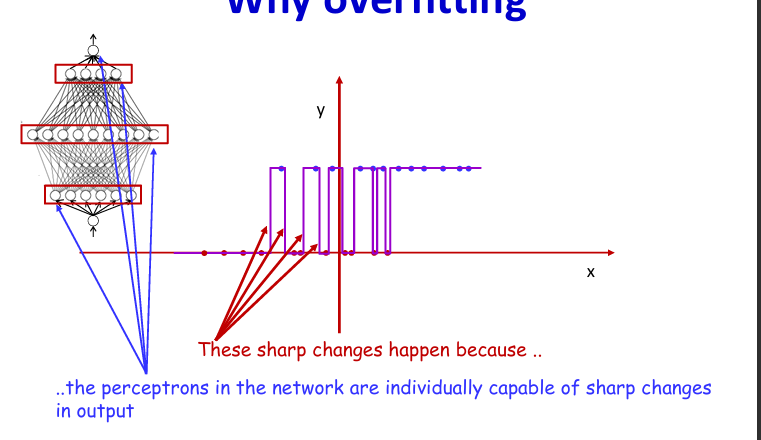

The perceptrons in the network can learn **sharp edges** like shown above, which causes overfitting. These sharp transitions allow the network to fit noise in the training data rather than learning the underlying pattern.

---

## The Solution: Regularization

To solve this problem, we add an extra term to our loss function that **penalizes large weights**, which prevents perceptrons from creating sharp edges.

### Regularized Loss Function

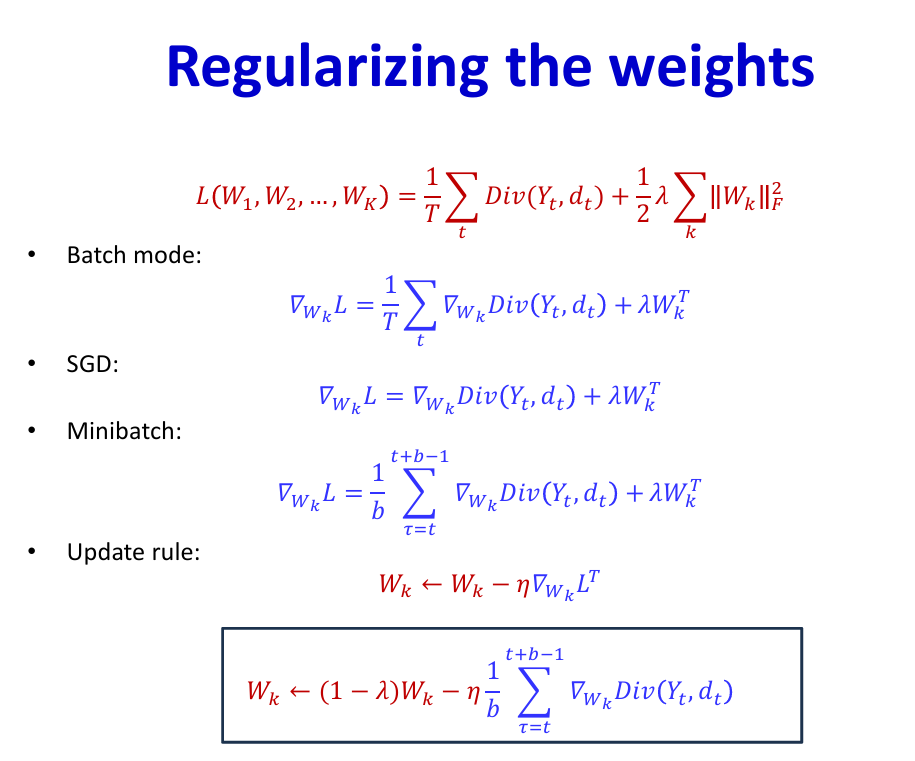

**Original Loss:**
$$L(W_1, W_2, ..., W_K) = \frac{1}{T} \sum_{t} \text{Div}(Y_t, d_t)$$

**Regularized Loss (L2 Regularization):**
$$L(W_1, W_2, ..., W_K) = \frac{1}{T} \sum_{t} \text{Div}(Y_t, d_t) + \frac{1}{2}\lambda \sum_{k} \|W_k\|_F^2$$

Where:
- $\frac{1}{T} \sum_{t} \text{Div}(Y_t, d_t)$ = average loss over training examples
- $\lambda$ = regularization strength (hyperparameter)
- $\|W_k\|_F^2$ = Frobenius norm squared of weight matrix $W_k$
- $\sum_{k}$ = sum over all layers

---

## How Regularization Prevents Sharp Edges

### Weight Penalty Effect

The term $\frac{1}{2}\lambda \sum_{k} \|W_k\|_F^2$ penalizes large weights:

$$\|W_k\|_F^2 = \sum_{i,j} W_{k,ij}^2$$

**Why this helps:**

1. **Large weights** $\rightarrow$ **Sharp activation transitions**
   $$z = w^T x + b \quad \text{with large } |w| \rightarrow \text{steep slope}$$

2. **Regularization forces smaller weights** $\rightarrow$ **Smoother functions**
   $$\min_W \left[ \text{Loss} + \lambda \|W\|^2 \right] \rightarrow \text{smaller } W$$

3. **Smoother functions generalize better** $\rightarrow$ **Less overfitting**

---

## Gradient Update with Regularization

### Batch Mode:
$$\nabla_{W_k} L = \frac{1}{T} \sum_{t} \nabla_{W_k} \text{Div}(Y_t, d_t) + \lambda W_k^T$$

### SGD:
$$\nabla_{W_k} L = \nabla_{W_k} \text{Div}(Y_t, d_t) + \lambda W_k^T$$

### Minibatch:
$$\nabla_{W_k} L = \frac{1}{b} \sum_{\tau=t}^{t+b-1} \nabla_{W_k} \text{Div}(Y_\tau, d_\tau) + \lambda W_k^T$$

### Weight Update Rule:
$$W_k \leftarrow W_k - \eta \nabla_{W_k} L^T$$

Substituting the gradient:
$$W_k \leftarrow W_k - \eta \left[\frac{1}{b} \sum_{\tau=t}^{t+b-1} \nabla_{W_k} \text{Div}(Y_\tau, d_\tau) + \lambda W_k^T \right]$$

**Simplified form:**
$$W_k \leftarrow (1 - \lambda)W_k - \eta \frac{1}{b} \sum_{\tau=t}^{t+b-1} \nabla_{W_k} \text{Div}(Y_\tau, d_\tau)$$

---

## Key Insight

The term $(1 - \lambda)W_k$ causes **weight decay**:
- At each update, weights are multiplied by $(1 - \lambda) < 1$
- This shrinks weights toward zero
- Prevents weights from growing too large
- Results in smoother, more generalizable functions

**Effect:**
$$\text{Large } \lambda \rightarrow \text{Strong regularization} \rightarrow \text{Smoother but potentially underfit}$$
$$\text{Small } \lambda \rightarrow \text{Weak regularization} \rightarrow \text{More complex but potentially overfit}$$

---

## Summary

> **Regularization** adds a penalty term $\frac{1}{2}\lambda \sum_k \|W_k\|_F^2$ to the loss function, which prevents the network from learning sharp edges by keeping weights small. This is also known as **L2 regularization** or **weight decay**.

# Underfitting
